## Importing Dependencies

In [1]:
import cv2
import numpy as np
import dlib  #before installing dlib, installation of ctype is required
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Face Detection
Predicting the Face in the Webcam, in return we get coordinates of a diagonal of a rectangular region where our face is.  

In [147]:
cam= cv2.VideoCapture(0)  #Aquiring Webcam

detector= dlib.get_frontal_face_detector()

while True:
    _,frame= cam.read()
    frame= cv2.flip(frame,1)
    grayFrame= cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)     #Converting image to grayscale format
    
    faces= detector(grayFrame)        #Detecting face and returning rectangle's diagonal coordinates
    for face in faces:
        x1= face.left()
        y1= face.top()
        x2= face.right()
        y2= face.bottom()
        cv2.rectangle(frame,(x1,y1),(x2,y2),(255,0,0),2)    #adding the rectangle to the frame
    
    cv2.imshow('Frame', frame)

    key= cv2.waitKey(1)
    if key== 27:
        break
        
cam.release()
cv2.destroyAllWindows()

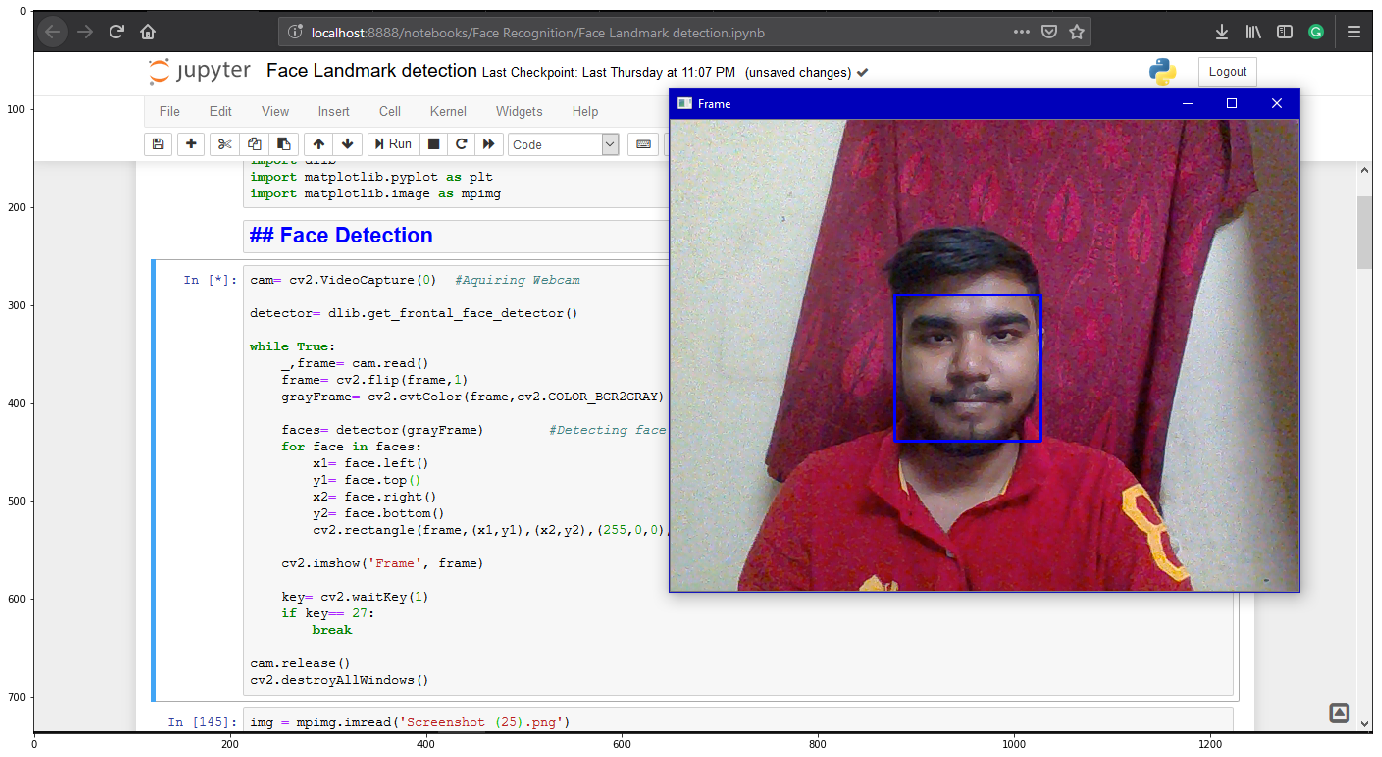

In [150]:
img = mpimg.imread('Screenshot1.png')
plt.figure(figsize=(24,48))
plt.imshow(img)
plt.show()

## Landmark Prediction
There are 68 landmarks in dlib's shape_predictor function. First predicting landmark then applying it on the camera's frame.
Below, there is image which shows what is the index number of different points on face.

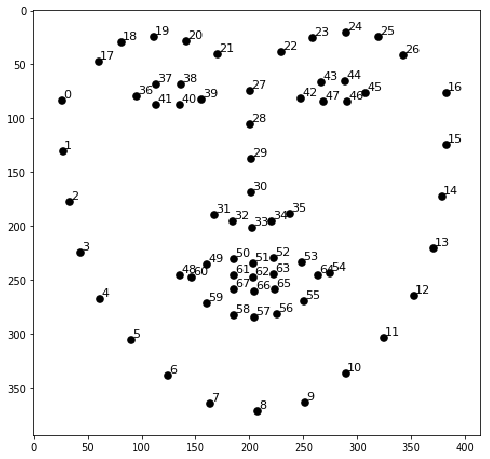

In [154]:
img = mpimg.imread('facemarks points.png')
plt.figure(figsize=(8,18))
plt.imshow(img)
plt.show()

In [148]:
cam= cv2.VideoCapture(0)  #Aquiring Webcam

detector= dlib.get_frontal_face_detector()
predictor= dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

while True:
    _,frame= cam.read()
    frame= cv2.flip(frame,1)
    grayFrame= cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)     #Converting image to grayscale format
    
    faces= detector(grayFrame)   
    for face in faces:
        
        landmark= predictor(grayFrame,face)   #predicting 68 landmarks 
        for i in range(0,68):              #printing landmarks of lips
            x= landmark.part(i).x
            y= landmark.part(i).y
            cv2.circle(frame,(x,y),2,(0,255,0),-1)
        
    cv2.imshow('Frame', frame)

    key= cv2.waitKey(1)
    if key== 27:
        break
        
cam.release()
cv2.destroyAllWindows()

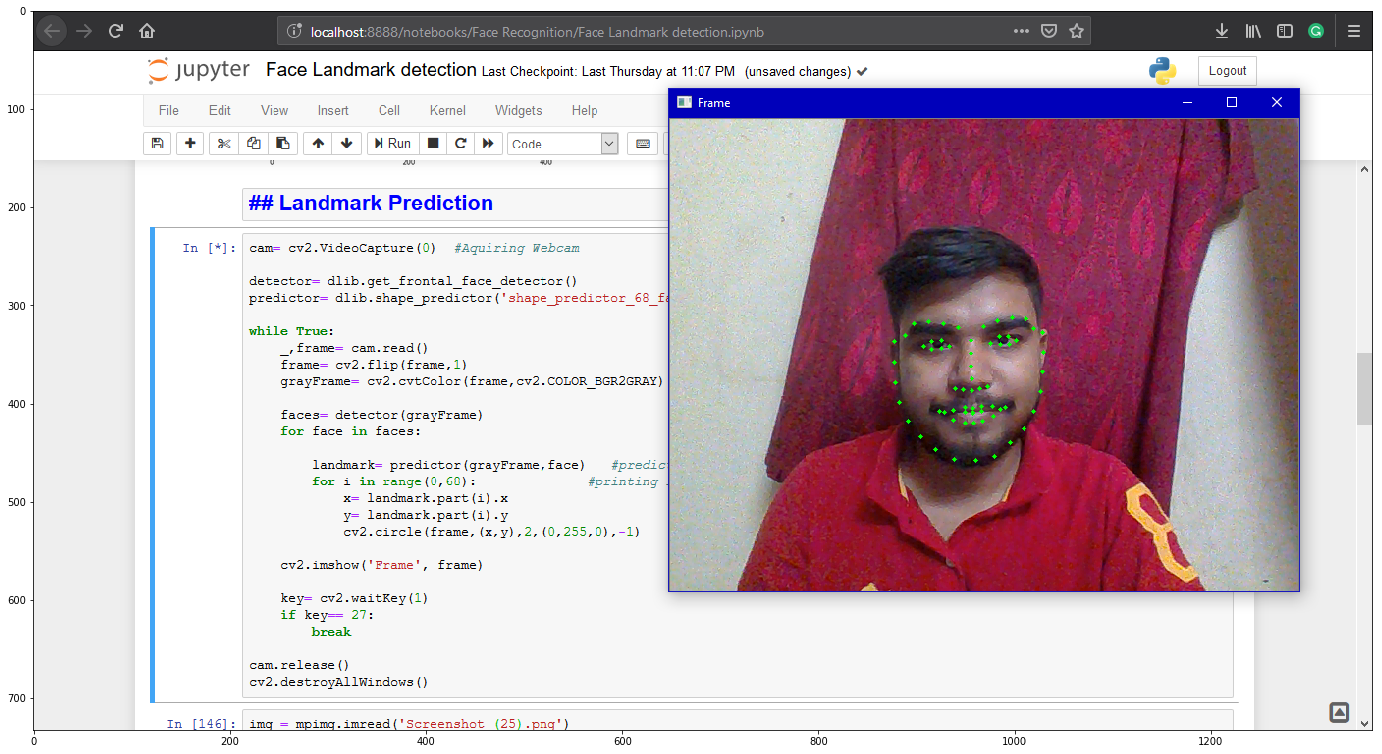

In [149]:
img = mpimg.imread('Screenshot2.png')
plt.figure(figsize=(24,48))
plt.imshow(img)
plt.show()

## Applying lipstick 
Out of 68 landmarks there are 20 landmarks which belongs to mouth which is out target for applying lipstick. First detecting those 20 points and after that applying lip coloring algorithm which gives red color to lip while keeping luminocity constant. This makes lipstick appear more real.

In [5]:
cam= cv2.VideoCapture(0)  #Aquiring Webcam

detector= dlib.get_frontal_face_detector()
predictor= dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

mouthCoord=[]
while True:
    _,frame= cam.read()
    frame= cv2.flip(frame,1)
    frameC= frame.copy()
    F= frame.copy()
    grayFrame= cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)     #Converting image to grayscale format
    
    faces= detector(grayFrame)   
    for face in faces:
        
        mouthCoord=[]
        landmark= predictor(grayFrame,face)   #predicting 68 landmarks 
        for i in range(48,68):              #printing landmarks of lips
            x= landmark.part(i).x
            y= landmark.part(i).y
            #cv2.circle(frame,(x,y),1,(0,255,0),-1)
            mouthCoord.append([x,y])
            
        poly1=np.array(mouthCoord[:12], np.int32).reshape((-1,1,2))
        poly2=np.array(mouthCoord[12:], np.int32).reshape((-1,1,2))
        yewala= cv2.fillPoly(frameC, [poly1,poly2], (0,0,180))
        cv2.addWeighted(yewala, 0.4, frame, 0.6 , 0, frame)


    cv2.imshow('Final', frame)
    cv2.imshow('Original',F)

    key= cv2.waitKey(1)
    if key== 27:
        break
        
cam.release()
cv2.destroyAllWindows()


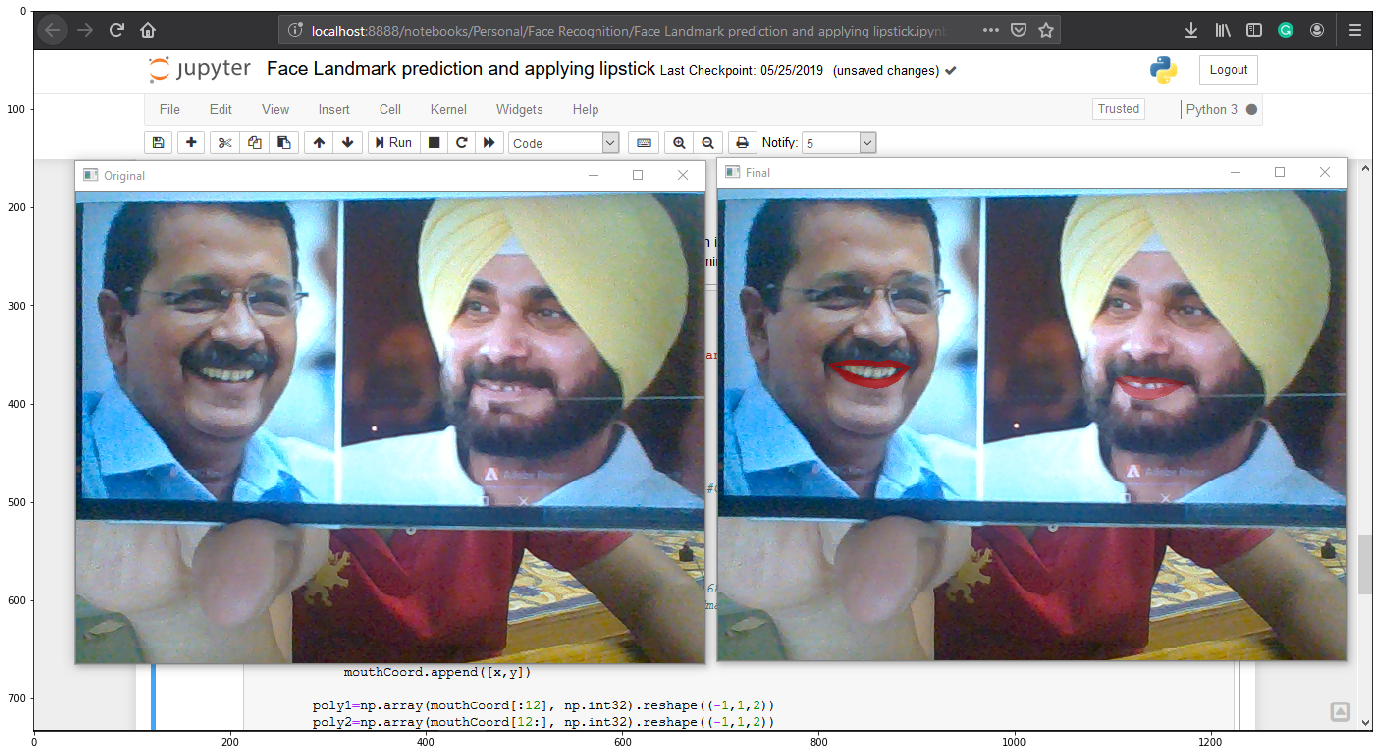

In [7]:
img = mpimg.imread('Screenshot3.png')
plt.figure(figsize=(24,48))
plt.imshow(img)
plt.show()

In [111]:
cam.release()
cv2.destroyAllWindows()